In [ ]:
#Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
pmsh = pd.read_csv("salary_Data.csv")

In [3]:
pmsh.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
pmsh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
pmsh.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


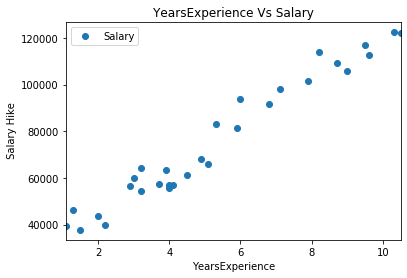

In [10]:
pmsh.plot(x= 'YearsExperience', y = 'Salary',style='o')
plt.title('YearsExperience Vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel(' Salary Hike')
plt.show()

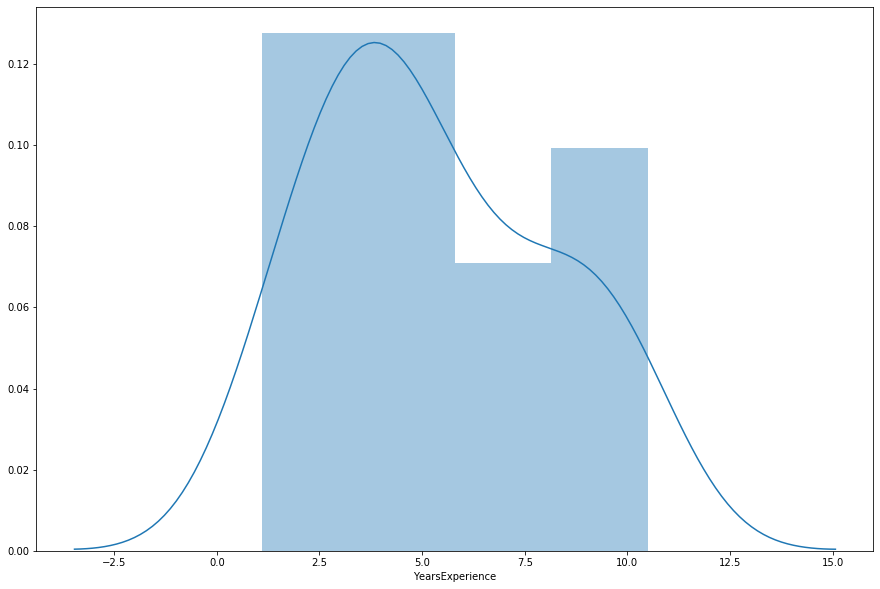

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(pmsh['YearsExperience'])

In [41]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(pmsh['YearsExperience'], pmsh['Salary'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(pmsh['YearsExperience'], pmsh['Salary'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.978
Spearmans correlation: 0.957


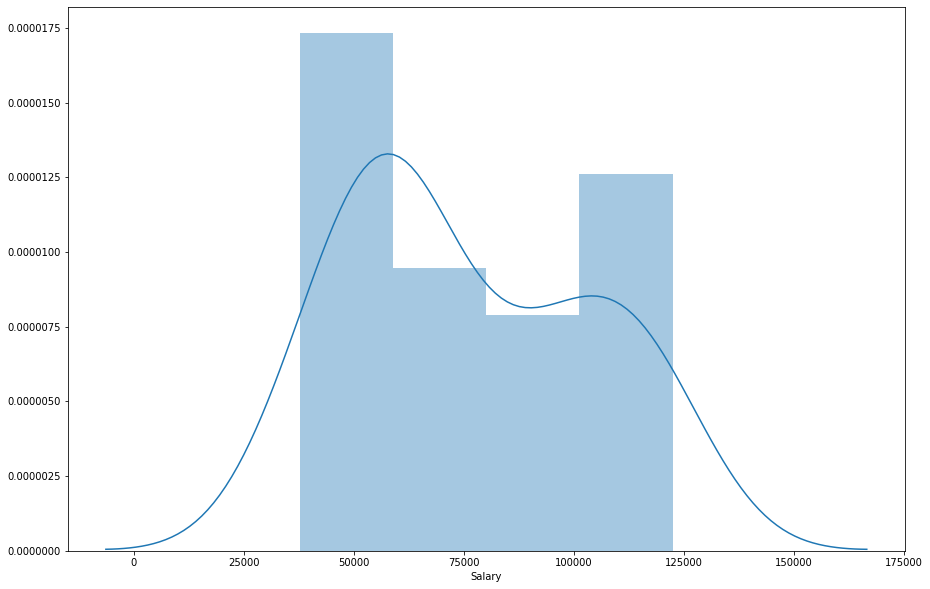

In [20]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(pmsh['Salary'])

In [22]:
X= pmsh['YearsExperience'].values.reshape(-1,1)
y= pmsh['Salary'].values.reshape(-1,1)

In [24]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

In [25]:
predict_salary_hike =LinearRegression()
predict_salary_hike.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print('Intercept Value of Salary model is ',predict_salary_hike.intercept_ )
print('Coefficient value of model is ', predict_salary_hike.coef_)

Intercept Vale of Salary model is  [26780.09915063]
CoEfficient value of model is  [[9312.57512673]]


In [28]:
y_predict = predict_salary_hike.predict(X_test)

In [29]:
y_predict

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [30]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_predict.flatten()})
pmsh_pf

,Actual,Predict
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


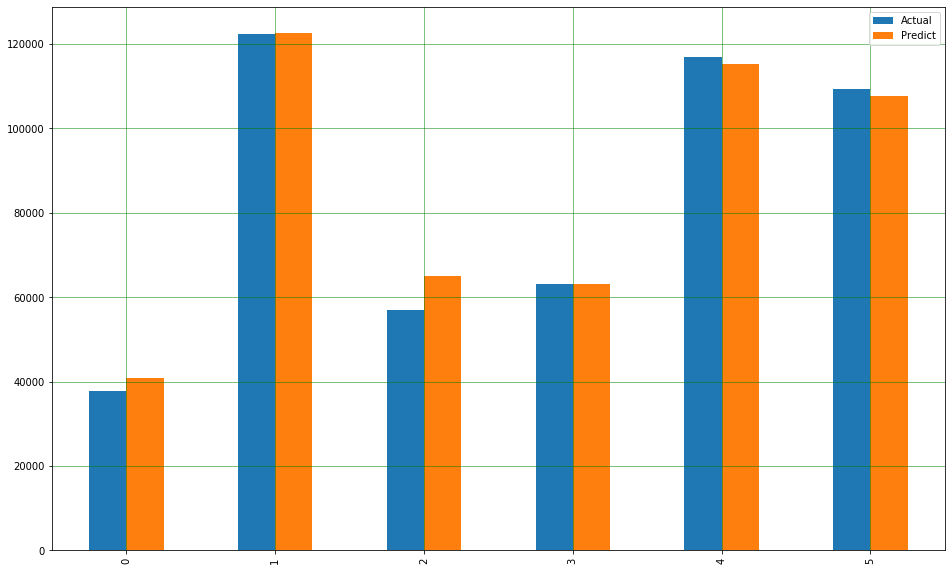

In [33]:
pmsh_ye =pmsh_pf.head(6)
pmsh_ye.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

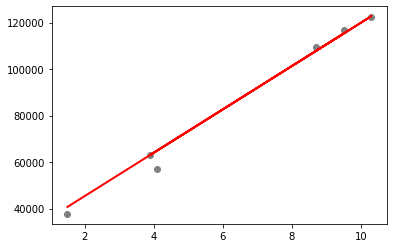

In [35]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.show()

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
Root Mean Squared Error: 3580.979237321345
